# Probabilistic Computing
---

The field of probabilistic computing, where the concept of randomness is harnessed to enhance certain computations, is currently experiencing a resurgence driven by the explosion of machine learning and AI algorithms that exploit these effects. However, in the context of classical circuits, randomness is almost always associated with the unwanted effects from noise. Bits stored in magnetic drives can randomly flip when exposed to certain magnetic fields, a **NOT** gate could mistakenly invert its output if there's a glitch in its power supply, and every so often, a cosmic ray particle can cause enough charge accumulation to modify values in memory. 

Therefore, a natural way to introduce probabilistic effects into digital logic is by "upgrading" the concept of a bit to a probability bit (p-bit). In this context, a convenient way to represent p-bits is by the use of a [probability vector](https://en.wikipedia.org/wiki/Probability_vector), where an element of the vector represents the probability of measuring the binary value given by the vector index of that element.

## 1. Single-Bit Probabilistic Systems

### 1.1 Probabilistic Single-Bit States (p-bits)

Let us start by considering the case of a noisy **NOT** gate that, whenever its input is supposed to be $0$, the output is either $0$ with probability of $1/4$, or a $1$ with probability of $3/4$. Physically, this model could describe a poorly-designed circuit where the stage preceding the **NOT** gate is not supplying low enough of a voltage, causing the gate toggle down to $0$ every so often due to noise:

<img src="images\01_04_03_noisy_not.png" align = "center" width="560"/>

We could represent the output state of uncertainty of this gate with a column vector, where the top element is the probability of the output being $0$, and the bottom element the probability of measuring a $1$:

$$ \vec{p} = \begin{bmatrix} \frac{1}{4} \\ \frac{3}{4} \end{bmatrix} .$$ 

More generally, a probability vector can be expressed as:

$$ \vec{p} = \begin{bmatrix} \varrho_{0} \\ \varrho_{1} \end{bmatrix} ,$$

where $\varrho_{0}$ and $\varrho_{1}$ represent the probabilities associated with the state being $0$ or $1$, respectively. Like all probabilities, these vector elements must meet the condition of being bounded between $0$ and $1$ ($\varrho_{0}, \varrho_{1} \in [0,1]$), and summing up to $1$ ($\varrho_{0} + \varrho_{1} = 1$).

From a practical standpoint, this probability vector encodes information about how likely it is to **measure** a $0$ or a $1$ for a given p-bit. Going back to the example of our noisy gate, a measurement could consist of, for example, connecting the output of the gate to a register that stores its value every clock cycle. The register's history will then look something like this:

$$ \{1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, \dots \}, $$

where for a large number of measurements $n$, the frequency of a given outcome ($n_0$ for $0$ or $n_1$ for $1$) with respect to the total number of outcomes approaches the expected probability ($\varrho_0$ or $\varrho_1$):

$$
\begin{aligned}
\lim_{n\to\infty}\frac{n_0}{n} &= \varrho_0 = \frac{1}{4}
\\
\\
\lim_{n\to\infty}\frac{n_1}{n} &= \varrho_1 = \frac{3}{4}
\end{aligned}
$$

Let's take a look at how to simulate something like this in Python. We will define a probability vector, and sample $0$ or $1$ using its probability amplitudes. We will use [Matplotlib](https://matplotlib.org/) to plot the results.


In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
# Define vector p
ϱ0, ϱ1 = (1/4, 3/4)
vec_p = np.array([[ϱ0],
                  [ϱ1]])
sp.Matrix(vec_p)

Matrix([
[0.25],
[0.75]])

In [3]:
n_samps = 200                   # number of samples
vals = [0, 1]                   # Possible outcomes: 0 or 1
probs = (vec_p).reshape(-1)     # Flatten to 1D array with probabilities for 0 and 1

# sample 0 or 1 a 100 times using probabilities from |p⟩
samples = np.random.choice(vals, size=n_samps, p=probs)
print(samples)

[1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1]


In [4]:
# Calculate frequency of outcomes
freq_0 = np.count_nonzero(samples == 0)/n_samps
freq_1 = np.count_nonzero(samples == 1)/n_samps

print(f'For ϱ0 = {ϱ0} and {n_samps} samples, the relative frequency of 0s is {freq_0}')
print(f'For ϱ1 = {ϱ1} and {n_samps} samples, the relative frequency of 1s is {freq_1}')

For ϱ0 = 0.25 and 200 samples, the relative frequency of 0s is 0.245
For ϱ1 = 0.75 and 200 samples, the relative frequency of 1s is 0.755


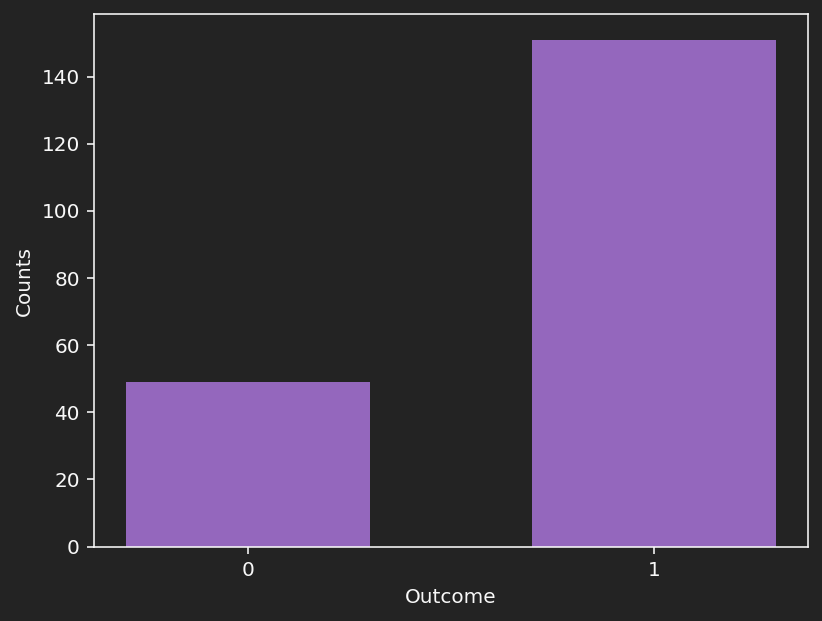

In [5]:
# Plot number of counts for outcomes 0 and 1
plt.hist(samples, bins=[-0.3, 0.3, 0.7, 1.3], color='tab:purple')
plt.xticks([0,1])
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()

Now, note that unlike in the previous chapter, where we relabeled the bit vector $\vec{b}$ to use ket notation $|b\rangle$, here we have opted to denote our probability vector as $\vec{p}$. We've purposely done this to emphasize that there are some distinctions between some of the properties of p-bits and qubits. For instance, recall from that the magnitude of a real-valued vector is given by its Euclidean norm:

$$ \|\vec{p}\| = \sqrt{\varrho_{0}^2 + \varrho_{1}^2} .$$

And because probabilities must always add up to $1$, the length of our vector will actually changes depending on the values of $\varrho_{0}$ and $\varrho_{1}$. For example, for $\vec{p} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$, we get $\|\vec{p}\| = 1$. On the other hand, if $\vec{p} = \begin{bmatrix} \frac{1}{4} \\ \frac{3}{4} \end{bmatrix}$, then $\|\vec{p}\| \approx 0.79$. The dotted line in the figure below shows how the magnitude of the probability vector changes for different probability values:

<img src="images\01_04_01_prob_vec_length.png" align = "center" width="200"/>

This is very different from what we will encounter for qubits, where for quantum vector $|\psi\rangle$ the sum of the each of its elements **squared** always adds up to $1$, which implies $\|\psi\| = 1$ for all $|\psi\rangle$. This is depicted below for the specific case of $\alpha_0, \alpha_1 \in [0,1]$.

<img src="images\01_04_02_prob_amps_vec_length.png" align = "center" width="200"/>

### 1.2 Probabilistic Single-Bit Gates

Let's reconsider the noisy **NOT** gate for which an input of $0$ results in an output of $0$ with probability $1/4$, and an output of $1$ with probability $3/4$. Now, let's assume that when the input to this gate is $1$, the gate behaves just as expected. This means that its output is $0$ with probability of $1$, and $1$ with probability $0$. We could then construct a matrix $P$ that relates the inputs and outputs according to this relations:

$$
\begin{aligned}
\begin{bmatrix} 1 \\ 0 \end{bmatrix} &\xrightarrow{\; \; P \; \;} \begin{bmatrix} \frac{1}{4} \\ \frac{3}{4} \end{bmatrix}
\\
\\
\begin{bmatrix} 0 \\ 1 \end{bmatrix} &\xrightarrow{\; \; P \; \;} \begin{bmatrix} 1 \\ 0 \end{bmatrix}
\end{aligned}
$$

Allowing $P$ to be a general matrix with elements $\rho_{ij}$, we can write the first of these relations as:

$$
\begin{aligned}
\begin{bmatrix} \frac{1}{4} \\ \frac{3}{4} \end{bmatrix} &= 
\begin{bmatrix} \rho_{00} & \rho_{01} \\ \rho_{10} & \rho_{11} \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix}
\\
\\
\begin{bmatrix} \frac{1}{4} \\ \frac{3}{4} \end{bmatrix} &= \begin{bmatrix} \rho_{00} \\ \rho_{10} \end{bmatrix},
\end{aligned}
$$

which implies $\rho_{00} = \frac{1}{4}$ and $\rho_{10} = \frac{3}{4}$. Similarly, for the second relation:

$$
\begin{aligned}
\begin{bmatrix} 1 \\ 0 \end{bmatrix} &= 
\begin{bmatrix} \rho_{00} & \rho_{01} \\ \rho_{10} & \rho_{11} \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\\
\begin{bmatrix} 1 \\ 0 \end{bmatrix} &= \begin{bmatrix} \rho_{01} \\ \rho_{11} \end{bmatrix},
\end{aligned}
$$

resulting in $\rho_{01} = 1$ and $\rho_{11} = 0$. We can then put together the matrix:

$$ P = \begin{bmatrix} \frac{1}{4} & 1 \\ \frac{3}{4} & 0 \end{bmatrix} $$

The most important thing to note about these probability matrices is that their corresponding inverse matrix $P^{-1}$ is not physically implementable. This means that we cannot associate them with any sort of reversible gates like the ones we presented in previous chapters for deterministic circuits. Intuitively, this makes sense since probabilities are a measure of uncertainty; therefore, it doesn't make sense to think that the effect of a gate that introduces randomness could be "canceled out" by some other probabilistic gate. Let us, for example, look at the inverse matrix of the example above:

$$
\begin{aligned}
P^{-1} &= \frac{1}{\rho_{00}\rho_{11} - \rho_{01}\rho_{10}} \begin{bmatrix} \phantom{-}\rho_{11} & -\rho_{01} \\ -\rho_{10} & \phantom{-}\rho_{00} \end{bmatrix}
\\
\\
P^{-1} &= \frac{1}{\frac{1}{4} \times 0 - 1 \times \frac{3}{4}} \begin{bmatrix} \phantom{-}0 & -1 \\ -\frac{3}{4} & \phantom{-}\frac{1}{4} \end{bmatrix}
\\
\\
P^{-1} &= \begin{bmatrix} 0 & \phantom{-}\frac{4}{3} \\ 1 & -\frac{1}{3} \end{bmatrix}
\end{aligned}
$$

The issue with $P^{-1}$ is that its entries must all be values between $0$ and $1$ since they should correspond to probabilities; and here, the entry $ -\frac{1}{3}$ clearly is not. As we will see in the next chapters, this is a major distinction with respect to the matrices associated with quantum circuits, which are always invertible.


In spite of this drawback, one very nice properties of p-bits is that deterministic reversible circuits do transform probability vectors in the correct manner. In the case of the $\text{X}$ gate, we can see that when applied to a p-bit, the order of the probabilities in the vector gets flipped:

$$
\begin{aligned}
\vec{p}_{out} &= \text{X } \vec{p}_{in}
\\
\\
\vec{p}_{out} &= \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} \varrho_{0} \\ \varrho_{1} \end{bmatrix}
\\
\\
\vec{p}_{out} &= \begin{bmatrix} \varrho_{1} \\ \varrho_{0} \end{bmatrix}.
\end{aligned}
$$

This makes complete sense if we consider, for example, passing through an $\text{X}$ gate a sequence of values that have probability $\varrho_0$ of being in state $0$ and $\varrho_1$ of being in state $1$ . The output will then correspond to the inverted version of that sequence, which will then have opposite probabilities for each of the states:

<img src="images\01_04_04_pbit_thru_x_gate.png" align = "center" width="440"/>

This also generalizes to multi-bit reversible gates, as we will see in the next section. It is also worth noting that the construction of [invertible p-bit gates](https://arxiv.org/pdf/1809.04028) is not trivial, but there have been some recent efforts to develop such technology.

## 2. Multi-Bit Probabilistic Systems

### 2.1 Probabilistic Multi-Bit States

A nice property of probability vectors is that, for the case of statistically-independent p-bits, we can still use the Kronecker product to construct the vector that describes a larger system. For example, take the following two p-bits:

$$ 
\vec{p}_0 = \begin{bmatrix} \frac{1}{4} \\ \frac{3}{4} \end{bmatrix} \qquad 
\vec{p}_1 = \begin{bmatrix} \frac{2}{3} \\ \frac{1}{3} \end{bmatrix}
$$

The composite system will have a probability vector given by:

$$ 
\begin{aligned}
\vec{p} &= \vec{p}_1  \otimes \vec{p}_0
\\
\\
\vec{p} &= \begin{bmatrix} \frac{2}{3} \\ \frac{1}{3} \end{bmatrix} \otimes 
           \begin{bmatrix} \frac{1}{4} \\ \frac{3}{4} \end{bmatrix}
\\
\\
\vec{p} &= \begin{bmatrix} \frac{1}{6} \\ \frac{1}{2} \\ \frac{1}{12} \\ \frac{1}{4} \end{bmatrix} .
\end{aligned}
$$

What this is implies is that, the corresponding probabilities of measuring the four possible states $\{00, 01, 10, 11 \}$ are given by $\{\frac{1}{6}, \frac{1}{2}, \frac{1}{12}, \frac{1}{4}\}$, respectively.